In [1]:
import os
# Find the latest version of spark 3.0 from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.0.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [2]:
# Download the Postgres driver that will allow Spark to interact with Postgres.
!wget https://jdbc.postgresql.org/download/postgresql-42.2.16.jar

--2021-11-17 00:31:33--  https://jdbc.postgresql.org/download/postgresql-42.2.16.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002883 (979K) [application/java-archive]
Saving to: ‘postgresql-42.2.16.jar’

postgresql-42.2.16. 100%[===================>] 979.38K  --.-KB/s    in 0.1s    

2021-11-17 00:31:33 (6.54 MB/s) - ‘postgresql-42.2.16.jar’ saved [1002883/1002883]



In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("M16-Amazon-Challenge").config("spark.driver.extraClassPath","/content/postgresql-42.2.16.jar").getOrCreate()

# Configure settings for RDS
jdbc_url="jdbc:postgresql://datavizm16.cyekg13tmsth.us-east-2.rds.amazonaws.com:5432/postgres"

# print(config)

In [10]:
pip install Config

In [23]:
config = {"user":"postgres", 
          "password":"", 
          "driver":"org.postgresql.Driver"}
print(config)

{'user': 'postgres', 'password': 'asdf1234', 'driver': 'org.postgresql.Driver'}


In [24]:
df = spark.read.jdbc(url=jdbc_url, table='customer_churn', properties=config)
df.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerid|gender|seniorcitizen|partner|dependents|tenure|phoneservice|   multiplelines|internetservice|     onlinesecurity|       onlinebackup|   deviceprotection|        techsupport|        streamingtv|    streamingmovies|      contract|paperlessbilling|       paymentmethod|monthlycharges|totalcharges|churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|  

In [25]:
import pandas as pd
Telco_df = df.toPandas()
Telco_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import tensorflow as tf
import numpy as np

In [27]:
# Import data using CSV
# Telco_df = pd.read_csv('C:/Users/petur/Group_10/Resources/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Telco_df

In [29]:
Telco_df.set_index('customerid', inplace=True)
Telco_df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [30]:
# Generate our categorical variable list
Telco_cat = Telco_df.dtypes[Telco_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
Telco_df[Telco_cat].nunique()

gender               2
seniorcitizen        2
partner              2
dependents           2
tenure              73
phoneservice         2
multiplelines        3
internetservice      3
onlinesecurity       3
onlinebackup         3
deviceprotection     3
techsupport          3
streamingtv          3
streamingmovies      3
contract             3
paperlessbilling     2
paymentmethod        4
churn                2
dtype: int64

In [32]:
Telco_df['totalcharges'] = pd.to_numeric(Telco_df['totalcharges'], errors='coerce')

In [33]:
Telco_df.dtypes

gender               object
seniorcitizen        object
partner              object
dependents           object
tenure               object
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [34]:
# Generate our categorical variable list
Telco_cat = Telco_df.dtypes[Telco_df.dtypes == "object"].index.tolist()

In [35]:
# Check the number of unique values in each column
Telco_df[Telco_cat].nunique()

gender               2
seniorcitizen        2
partner              2
dependents           2
tenure              73
phoneservice         2
multiplelines        3
internetservice      3
onlinesecurity       3
onlinebackup         3
deviceprotection     3
techsupport          3
streamingtv          3
streamingmovies      3
contract             3
paperlessbilling     2
paymentmethod        4
churn                2
dtype: int64

In [36]:
#Telco_df.dropna()
Telco_df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [38]:
Telco_df['totalcharges'].isnull().sum()

11

In [ ]:
Telco_df.dropna(inplace = True)

In [39]:
#Telco_df['TotalCharges'].isnull().sum() #TZ comment - testing the model with fillna
Telco_df['totalcharges'] = Telco_df['totalcharges'].fillna(Telco_df['totalcharges'].mean())

In [40]:
Telco_df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


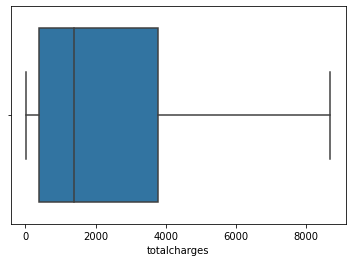

In [41]:
import seaborn as sns
sns.boxplot(x=Telco_df['totalcharges'])

In [42]:
Telco_df.dtypes

gender               object
seniorcitizen        object
partner              object
dependents           object
tenure               object
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [43]:
Telco_df.nunique()

gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [44]:
# Generate our categorical variable lists
Telco_cat = Telco_df.dtypes[Telco_df.dtypes == 'object'].index.tolist()
Telco_cat

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [45]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Telco_df[Telco_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(Telco_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,tenure_0,tenure_1,tenure_10,tenure_11,tenure_12,tenure_13,tenure_14,tenure_15,tenure_16,tenure_17,tenure_18,tenure_19,tenure_2,tenure_20,tenure_21,tenure_22,tenure_23,tenure_24,tenure_25,tenure_26,tenure_27,tenure_28,tenure_29,tenure_3,tenure_30,tenure_31,tenure_32,tenure_33,tenure_34,tenure_35,tenure_36,tenure_37,...,tenure_72,tenure_8,tenure_9,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [46]:
# Merge one-hot encoded features and drop the originals
Telco_df.reset_index(drop=True, inplace=True)
Telco_df = Telco_df.merge(encode_df, left_index=True, right_index=True)
Telco_df = Telco_df.drop(Telco_cat, 1)
Telco_df.head()

,monthlycharges,totalcharges,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,tenure_0,tenure_1,tenure_10,tenure_11,tenure_12,tenure_13,tenure_14,tenure_15,tenure_16,tenure_17,tenure_18,tenure_19,tenure_2,tenure_20,tenure_21,tenure_22,tenure_23,tenure_24,tenure_25,tenure_26,tenure_27,tenure_28,tenure_29,tenure_3,tenure_30,tenure_31,tenure_32,tenure_33,tenure_34,tenure_35,...,tenure_72,tenure_8,tenure_9,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,29.85,29.85,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
# Split our preprocessed data into out features and target arrays
y = Telco_df["churn_Yes"].values
X = Telco_df.drop(['churn_Yes','churn_No'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [49]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Naive Bayes

In [50]:
# Training the Naive Bayes model on the training set
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [51]:
y_pred = classifier.predict(X_test_scaled)
print(f" Naive Bayes model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Naive Bayes model accuracy: 0.678


In [52]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.63      0.74      1311
         1.0       0.43      0.82      0.57       450

    accuracy                           0.68      1761
   macro avg       0.67      0.72      0.65      1761
weighted avg       0.79      0.68      0.70      1761



In [53]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,825,486
Actual 1,81,369


# Naive Bayes - hyperparameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


Attempt 1: https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb

In [55]:
skf = StratifiedKFold(n_splits=10)
params = {}
nb = GaussianNB()
grid_search1 = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

In [56]:
grid_search1.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GaussianNB(), param_grid={}, return_train_score=True)

In [57]:
grid_search1.cv_results_

{'mean_fit_time': array([0.01102605]),
 'mean_score_time': array([0.00158165]),
 'mean_test_score': array([0.67095614]),
 'mean_train_score': array([0.68431567]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.64839319]),
 'split0_train_score': array([0.68840732]),
 'split1_test_score': array([0.70321361]),
 'split1_train_score': array([0.67872922]),
 'split2_test_score': array([0.67424242]),
 'split2_train_score': array([0.68742112]),
 'split3_test_score': array([0.65151515]),
 'split3_train_score': array([0.68342448]),
 'split4_test_score': array([0.64772727]),
 'split4_train_score': array([0.69751788]),
 'split5_test_score': array([0.65151515]),
 'split5_train_score': array([0.68700042]),
 'split6_test_score': array([0.68371212]),
 'split6_train_score': array([0.68300379]),
 'split7_test_score': array([0.69318182]),
 'split7_train_score': array([0.67900715]),
 'split8_test_score': array([0.69128788]),
 'split8_train_score': array([0.6777

In [58]:
print(grid_search1.best_estimator_)

# it looks like nothong is happening ....

GaussianNB()


In [59]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.6548831132471653
0.6710874869292436
0.7246453089244851


In [60]:
# Calculating the confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df_tuned = pd.DataFrame(
    cm_tuned, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df_tuned

,Predicted 0,Predicted 1
Actual 0,825,486
Actual 1,81,369


Attempt 2: https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

It looks like for Naive Bayes, there are only 2 parameters that can be used in grid search, adding link to the documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.

In [61]:
param_grid_nb = {
    'var_smoothing': np.logspace(1e-9,-9, num=43)
}

grid_search2 = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
grid_search2.fit(X_train_scaled, y_train)
print(grid_search2.best_estimator_)

Fitting 10 folds for each of 43 candidates, totalling 430 fits
GaussianNB(var_smoothing=0.03162277666236225)


In [62]:
# Predict on the Testing Data - to evaluate the tunes model’s accuracy.
y_pred2 = grid_search2.predict(X_test_scaled)
print(y_pred2)

[0. 0. 1. ... 0. 0. 0.]


In [63]:
# Calculating the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Create a DataFrame from the confusion matrix.
cm_df2 = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df2

,Predicted 0,Predicted 1
Actual 0,873,438
Actual 1,93,357


In attempt 2, it looks like the model worsens...

Attempt 3 with RepeatedStratifiedKFold and GridSearchCV
(https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/)

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=10, random_state=999)

In [65]:
from sklearn.preprocessing import PowerTransformer

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB, cv=cv_method, verbose=1, scoring='recall')

Data_transformed = PowerTransformer().fit_transform(X_test_scaled)

gs_NB.fit(Data_transformed, y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


Some explanations:

Data may not have a Gaussian distribution and instead may have a Gaussian-like distribution (e.g. nearly Gaussian but with outliers or a skew) or a totally different distribution (e.g. exponential).
As such, we may be able to achieve better performance on a wide range of machine learning algorithms by transforming input and/or output variables to have a Gaussian or more-Gaussian distribution. Some algorithms like linear regression and logistic regression explicitly assume the real-valued variables have a Gaussian distribution.

PowerTransformer() transforms our already scaled data to have a Gaussian distribution.

Power transforms refer to a class of techniques that use a power function (like a logarithm or exponent) to make the probability distribution of a variable Gaussian or more-Gaussian like.These power transforms are available in the scikit-learn Python machine learning library via the PowerTransformer class.

The class takes an argument named “method” that can be set to ‘yeo-johnson‘ or ‘box-cox‘ for the preferred method. It will also standardize the data automatically after the transform, meaning each variable will have a zero mean and unit variance. This can be turned off by setting the “standardize” argument to False.

----------
GridSearchCV - the only parameter we can experiment with in Naive Bayes models is 'var_smoothing'. We are asking GridSearch to find the parameter that retuns the best recall result.


In [66]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

In [67]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [68]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.629755820556502


In [69]:
# Calculating the confusion matrix
cm3 = confusion_matrix(y_test, predict_test)

# Create a DataFrame from the confusion matrix.
cm_df3 = pd.DataFrame(
    cm3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df3

,Predicted 0,Predicted 1
Actual 0,700,611
Actual 1,41,409


It looks like attempt 3 managed to improve the result - we accurately predicted 411 out of 477 churning customers;

In [70]:
print(f" Tuned Naive Bayes model accuracy: {accuracy_score(y_test, predict_test):.3f}")

 Tuned Naive Bayes model accuracy: 0.630


In [71]:
print(f1_score(y_test, predict_test, average="macro"))
print(precision_score(y_test, predict_test, average="macro"))
print(recall_score(y_test, predict_test, average="macro"))

0.6193618968055059
0.67282487893943
0.7214162217137046


In [72]:
report = classification_report(y_test, predict_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.94      0.53      0.68      1311
         1.0       0.40      0.91      0.56       450

    accuracy                           0.63      1761
   macro avg       0.67      0.72      0.62      1761
weighted avg       0.81      0.63      0.65      1761

